<a href="https://colab.research.google.com/github/Mariolh33/G2_100472188_100429058_P2/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Comparación de KMeans e implementación propia
https://github.com/Mariolh33/G2_100472188_100429058/blob/main/Practica2.ipynb

Mario Lafuente Hueso - 100472188

Pablo Martín Muñoz   - 100429058

Importamos el archivo stars2.csv del repositorio de github

In [ ]:
import pandas as pd

# URL del archivo CSV en GitHub
url = 'https://github.com/Mariolh33/G2_100472188_100429058_P2/raw/main/Stars2.csv'

# Cargar el archivo directamente con pandas
stars2 = pd.read_csv(url, encoding='utf-8')

# Explorar el DataFrame
print("Número de instancias y atributos de la tabla original: ", stars2.shape)
stars2


Número de instancias y atributos de la tabla original:  (240, 6)


,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

# Genera datos sintéticos
X, y = make_blobs(
    n_samples= 240,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    random_state=8858
)

print("Primeros 2 registros de X:")
print(X[:5])
print("Primeros 2 registros de y:")
print(y[:10])

Primeros 2 registros de X:
[[-0.12599552 -4.04779288]
 [-4.62684854 -3.94268412]
 [-7.75450411  8.44499733]
 [-4.90518232 -4.62301968]
 [ 0.80373109 -3.49845883]]
Primeros 2 registros de y:
[0 2 1 2 0 0 1 3 1 3]


In [ ]:
#inertias

Kmeans Sklearn:  3.7336349487304688
Kmeans propio:  9.850502014160156


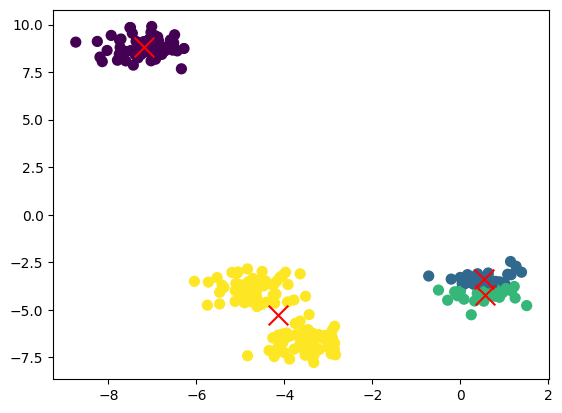

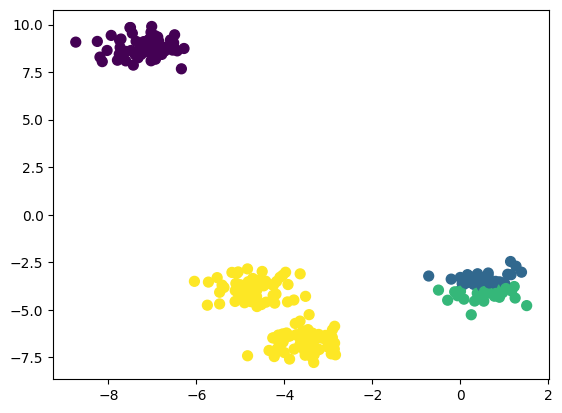

'\nprint(prediccion[0])\nprint(prediccion)\nprint(y)\n\nfor i in range(40):\n  print("vuelta",i)\n  print(prediccion[i],"<=>",y[i])\n  if prediccion[i]==y[i]:\n\n    print(True)'

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time


import numpy as np

class KMeans1:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def fit_1(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        # Inicialización de los centroides de manera aleatoria
        centroids_indices = np.random.choice(n_samples, size=self.n_clusters, replace=False)
        self.centroids = X[centroids_indices]

        # Bucle principal del algoritmo KMeans
        for _ in range(self.max_iter):
            # Asignar cada muestra al centroide más cercano
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)

            # Actualizar los centroides como la media de las muestras asignadas a cada cluster
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Comprobar si la convergencia ha sido alcanzada (si los centroides han cambiado menos que la tolerancia)
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

        # Calcular la inercia
        self.inertia_ = sum(np.min(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1))

        return self



    def predict(self, X):
        distances = np.array([[np.linalg.norm(point - centroid) for centroid in self.centroids] for point in X])
        return np.argmin(distances, axis=1)



kmeans = KMeans(n_clusters=4,init="random",
        n_init=1,
        random_state=8858)
start_time= time.time()
kmeans.fit(X)
end_time=(time.time()-start_time)*1000
print("Kmeans Sklearn: ",end_time)

#predict con el modelo creado
modelo_kmeans = KMeans1(
        n_clusters=4,
        random_state=8858
    )
start_time= time.time()
modelo_kmeans.fit_1(X)
end_time=(time.time()-start_time)*1000
print("Kmeans propio: ",end_time)

prediccion=modelo_kmeans.predict(X)
prediccion2=kmeans.predict(X)

centroids = modelo_kmeans.centroids
plt.scatter(X[:, 0], X[:, 1], c=prediccion, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red')
plt.show()


plt.scatter(X[:, 0], X[:, 1], c=prediccion2, s=50, cmap='viridis')

plt.show()
"""
print(prediccion[0])
print(prediccion)
print(y)

for i in range(40):
  print("vuelta",i)
  print(prediccion[i],"<=>",y[i])
  if prediccion[i]==y[i]:

    print(True)"""


Podemos comprobar que nuestra implementacion es más rápida que la de SKLearn. Esto se debe a que el kmeans de SKLearn es realmente el kmeans++ por lo que hace varias comprobaciones para coger los clusters iniciales y el tiempo aumenta.

In [ ]:

def pca(X, n_components):
    # Centramos los datos
    X_centered = X - np.mean(X, axis=0)

    # Calculamos la matriz de covarianza
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Calculamos los autovalores y autovectores de la matriz de covarianza
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Ordenamos los autovalores y autovectores en orden descendente
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Seleccionamos los primeros n_componentes autovectores
    principal_components = sorted_eigenvectors[:, :n_components]

    # Proyectamos los datos originales en el nuevo espacio de características
    X_pca = np.dot(X_centered, principal_components)

    return X_pca, principal_components

# Seleccionamos solo los atributos numéricos para PCA
X_numeric = stars2[['Temperature', 'L', 'R', 'A_M']].values

# Número de componentes principales deseado
n_components = 2

# Aplicamos PCA a los atributos numéricos
X_pca, principal_components = pca(X_numeric, n_components)

# Visualizamos la proyección resultante
print("Proyección PCA de los datos:")
print(X_pca)

Proyección PCA de los datos:
[[ 1.07320921e+05  5.17712147e+03]
 [ 1.07321469e+05  5.20311455e+03]
 [ 1.07330746e+05  5.64499848e+03]
 [ 1.07326548e+05  5.44505110e+03]
 [ 1.07344620e+05  6.30582528e+03]
 [ 1.07325708e+05  5.40506121e+03]
 [ 1.07329969e+05  5.60800814e+03]
 [ 1.07330746e+05  5.64499817e+03]
 [ 1.07329696e+05  5.59501144e+03]
 [ 1.07328647e+05  5.54502447e+03]
 [ 1.07309753e+05  4.64526318e+03]
 [ 1.07319630e+05  5.11613875e+03]
 [ 1.07319538e+05  5.11113843e+03]
 [ 1.07309163e+05  4.61726946e+03]
 [ 1.07329696e+05  5.59501063e+03]
 [ 1.07315210e+05  4.90519294e+03]
 [ 1.07326568e+05  5.44605052e+03]
 [ 1.07307822e+05  4.55328699e+03]
 [ 1.07318317e+05  5.05315378e+03]
 [ 1.07313055e+05  4.80422084e+03]
 [ 1.06860532e+05 -1.67491244e+04]
 [ 1.07222861e+05  5.06345629e+02]
 [ 1.07233776e+05  1.02620919e+03]
 [ 1.07206910e+05 -2.53454856e+02]
 [ 1.07038983e+05 -8.25135565e+03]
 [ 1.07112668e+05 -4.74227701e+03]
 [ 1.07205440e+05 -3.23436540e+02]
 [ 1.07223701e+05  5.46335

Método Elbow

1  1425.713785711317
2  513.4570525187734
3  267.2890824378781
4  260.2727371150118
5  145.61697105292004
6  136.92211859585294
7  128.7762486132905
8  123.92416135536736
9  116.00080309275121
10  109.53431970519428
11  104.32425205769758
12  100.22151702777197
13  94.7003526345223
14  91.6656704572683
15  90.84295939618575
16  86.79369375554204
17  87.0057041966111
18  85.7286529470536
19  83.47548418200654
20  83.02417485210972
21  81.01809425717931
22  75.98964386787159
23  73.05504746149933
24  71.81626864322318
25  70.48661869377018
26  69.23443942690218
27  67.01757391773549
28  65.7086125467645
29  63.257068387597


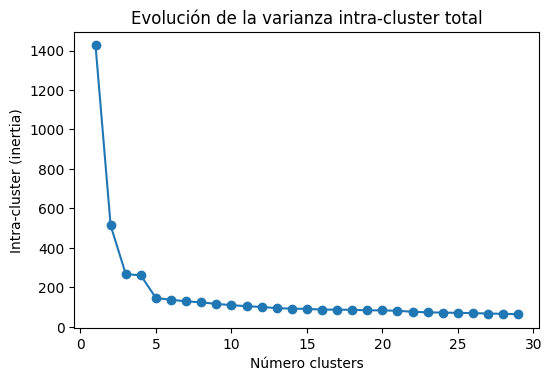

In [ ]:
# Implementación del método elbow para encontrar el número óptimo de clusters
range_n_clusters = range(1, 30)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans1(
        n_clusters=n_clusters,
        n_init=20,
        random_state=8858
    )
    modelo_kmeans.fit_1(X)
    print(n_clusters,"",modelo_kmeans.inertia_)
    inertias.append(modelo_kmeans.inertia_)

# Visualización del método elbow
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')

plt.show()

# 3.1 Hierarchical Clustering (Aglomerativo)
El algoritmo de clustering jerárquico aglomerativo construye una jerarquía de clusters fusionando gradualmente pares de clusters cercanos. Esto se puede visualizar fácilmente con dendrogramas. Utilizaremos la libreria scipy para utilizar este metodo de clustering.


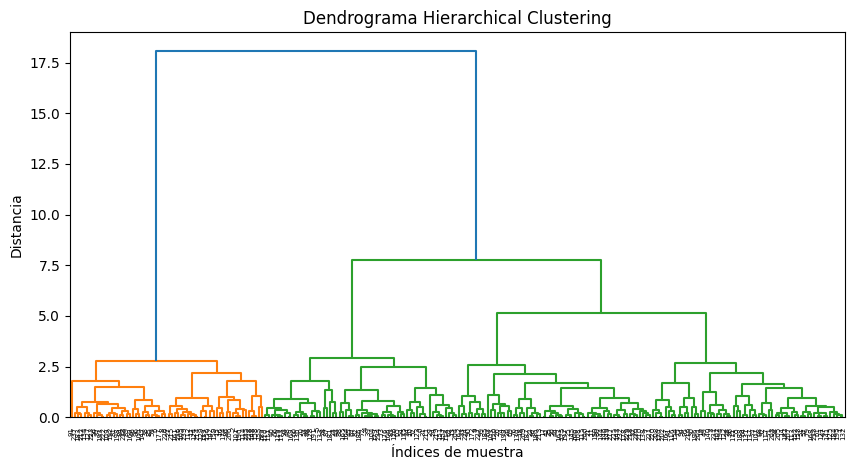

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calcular la matriz de enlace utilizando el método de enlace completo
Z = linkage(X, method='complete')

# Visualizar el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma Hierarchical Clustering')
plt.xlabel('Índices de muestra')
plt.ylabel('Distancia')
plt.show()

#3.2 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN es un algoritmo de clustering que agrupa puntos en áreas de alta densidad. Usaremos para ello, la implementación de DBSCAN de scikit-learn.

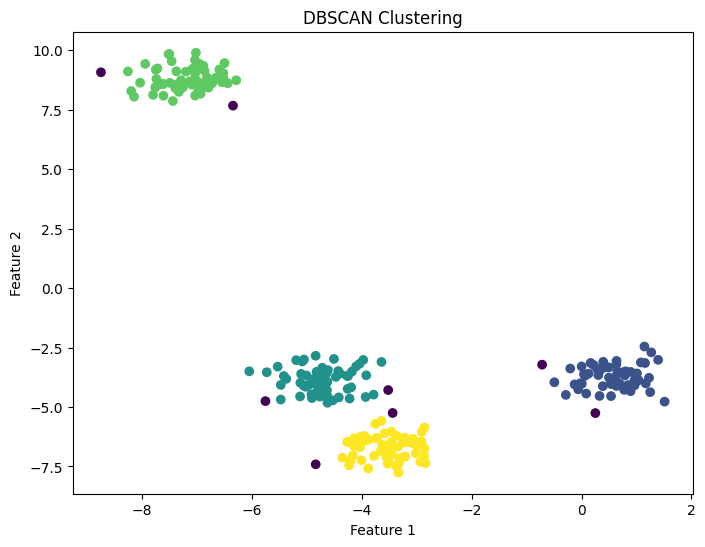

In [ ]:
from sklearn.cluster import DBSCAN

# Crear el objeto DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Ajustar el modelo DBSCAN a los datos
dbscan.fit(X)

# Obtener las etiquetas de los clusters asignados por DBSCAN
labels_dbscan = dbscan.labels_

# Visualizar los clusters encontrados por DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


DBSCAN tiene la capacidad de identificar regiones de alta densidad en el espacio de características y asignar puntos que están lo suficientemente cerca a estos cúmulos como parte del cluster, mientras que los puntos que están aislados o no están suficientemente cerca de ningún cúmulo principal son etiquetados como ruido. Por ello, los puntos morados serian ruido.



Podemos observar que en el Hierarchical Clustering, obtenemos muchísima información del clustering ya que podemos ver de manera dinámica cómo ha decidido el programa hacer los clusters. De esta manera, podemos observar que al tener la distancia de aproximadamente 3, podemos ver los 4 clusters que obtenemos tambien en kmeans y en DBSCAN, que son finalmente los mismos clusters.